In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [67]:
df=pd.read_csv('seattleWeather_1948-2017.csv')

In [68]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [69]:
df.shape

(25551, 5)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [71]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [72]:
df["PRCP"].fillna(df["PRCP"].mean(),inplace=True)

In [73]:
df['PRCP']

0        0.47
1        0.59
2        0.42
3        0.31
4        0.17
         ... 
25546    0.00
25547    0.00
25548    0.00
25549    0.00
25550    0.00
Name: PRCP, Length: 25551, dtype: float64

In [74]:
df['RAIN'].fillna(False,inplace=True)
df['RAIN']

0         True
1         True
2         True
3         True
4         True
         ...  
25546    False
25547    False
25548    False
25549    False
25550    False
Name: RAIN, Length: 25551, dtype: bool

In [75]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [76]:
# Find the relationship bet
# scatterplot bet Tmin and PRCP

In [77]:
# scatterplot bet Tmax and PRCP

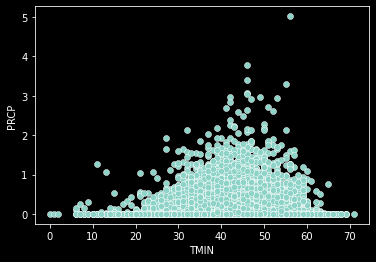

In [78]:
sns.scatterplot(data=df,x="TMIN",y="PRCP")

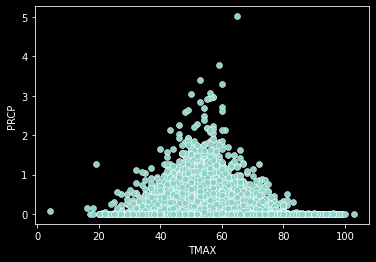

In [79]:
sns.scatterplot(data=df,x='TMAX',y='PRCP')

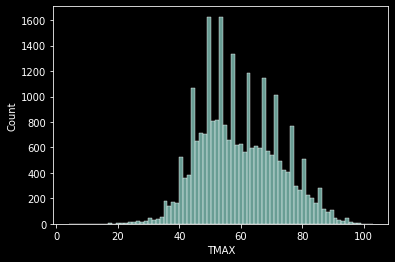

In [80]:
sns.histplot(df['TMAX'])

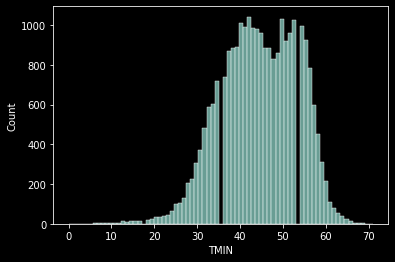

In [81]:
sns.histplot(df['TMIN'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


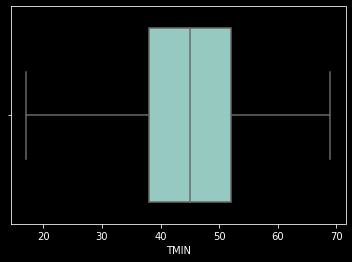

In [111]:

sns.boxplot('TMIN',data=df)

In [110]:
df=df.drop(df[df["TMIN"]<17].index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


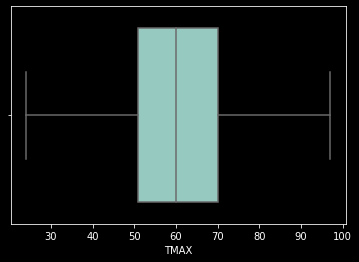

In [113]:
sns.boxplot('TMAX',data=df)

In [112]:
df=df.drop(df[df['TMAX']>97].index | df[df["TMAX"]<21].index)

<ipython-input-112-d22e22cace59>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df=df.drop(df[df['TMAX']>97].index | df[df["TMAX"]<21].index)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


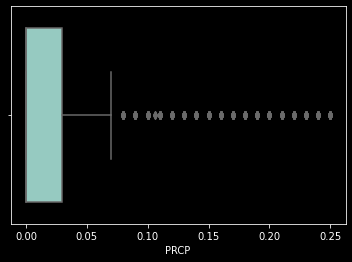

In [115]:
sns.boxplot('PRCP',data=df)

In [114]:
df=df.drop(df[df['PRCP']>0.25].index)

In [116]:
df.shape

(21893, 5)

In [89]:
# Aply Logistic Regression

In [90]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
4,1948-01-05,0.17,45,32,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
10,1948-01-11,0.01,42,32,True
11,1948-01-12,0.00,41,26,False


In [91]:
#Apply Label Encoding

In [92]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [93]:
df['RAIN']=le.fit_transform(df['RAIN'])

In [94]:
df['RAIN'].unique()

array([1, 0])

In [95]:
df["RAIN"].value_counts()

0    14569
1     7324
Name: RAIN, dtype: int64

In [96]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
4,1948-01-05,0.17,45,32,1
7,1948-01-08,0.04,48,35,1
8,1948-01-09,0.12,50,31,1
10,1948-01-11,0.01,42,32,1
11,1948-01-12,0.00,41,26,0


In [97]:
#Make Ind and Dep variable

In [98]:
X=df.drop(['RAIN','DATE'], axis=1)
y=df['RAIN']

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9)

In [100]:
x_train.shape

(15325, 3)

In [101]:
x_test.shape

(6568, 3)

In [102]:
y_train.shape

(15325,)

In [103]:
y_test.shape

(6568,)

In [104]:
from sklearn.linear_model import LogisticRegression
Log_reg=LogisticRegression()

In [105]:
Log_reg.fit(x_train,y_train)

LogisticRegression()

In [106]:
y_pred=Log_reg.predict(x_test)

In [107]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [108]:
Log_reg.score(x_test,y_test)

0.9162606577344702

In [109]:
Log_reg.predict([[0.12,44,32]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])